# **PROJECT NAME : RETAIL SALES PREDICTION.**
## **Project Type: Regression Analysis**


---



---

## Project Summary:

---

---

Rossmann operates over 3000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for upto six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of indivitual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied. We are provided with historical sales data for **1115 Rossmann stores**. The task is to forecast the **sales column** for the test set. Some of the stores in the dataset were temporarily closed for refurbishment.

## Data Description of each column in our dataset:

---

---


1.   **Store** ⇒ Store id
1.   **Sales** ⇒ Sales made for the day
1.   **Customers** ⇒ No. of Customers for the day
1.   **Open** ⇒ Wheather the store was opened or closed (0: closed & 1: open).
2.   **StateHoliday** ⇒ Wheather the day was State holiday or not.
2.   **SchoolHoliday** ⇒ Wheather the day was School holiday or not.
2.   **StoreType** ⇒ Types of Stores.
1.   **Assortment** ⇒ Types of assortment.
1.   **Competitiondistance** ⇒ Distance from the nearest competetor store.
2.   **promo** ⇒ Store running promo or not.
2.   **Promo2** ⇒ Store running consequitive promo or not.
1.   **Date** ⇒ Date o Sales.
1.   **DayOfWeek** ⇒ Seriel number of the day in a Week.




In [164]:
# Importing all the Library.
import numpy as np
from numpy import math
import pandas as pd

from datetime import datetime
from datetime import date
from datetime import timedelta

import matplotlib.pyplot as plt
%matplotlib inline

import plotly.express as px
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor

from scipy.stats import norm
from scipy.stats import uniform
from scipy.stats import zscore

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_percentage_error as mape

import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

from IPython.display import Image

In [2]:
#  Importing the google drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Reading the Store Dataset
Store_df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DATA SCIENCE/MACHINE LEARNING/PROJECT/REGRESSION/DATA/store.csv")

In [4]:
# Reading the Rossmann Dataset
rossmann_df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DATA SCIENCE/MACHINE LEARNING/PROJECT/REGRESSION/DATA/Rossmann Stores Data.csv")

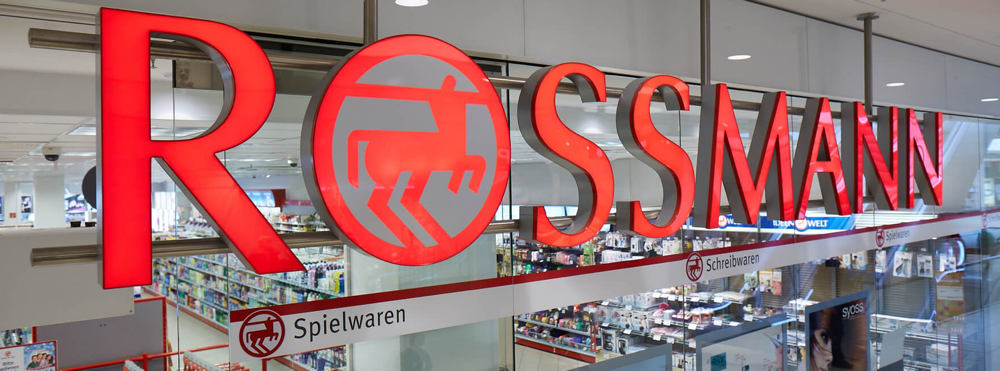

In [5]:
# Importing the image
Image('/content/drive/MyDrive/Colab Notebooks/DATA SCIENCE/MACHINE LEARNING/PROJECT/REGRESSION/104977231-ca344600-59dd-11eb-94c4-26f431bc2802.png')

## **Exploratory Data Analysis on Store_df**

In [6]:
# First look.
Store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [7]:
# shape of the dataset.
Store_df.shape

(1115, 10)

In [8]:
# List of name of the columns.
Store_df.columns.tolist()

['Store',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'PromoInterval']

In [9]:
# Store_df information.
Store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [10]:
# Store_df description.
Store_df.describe(include= 'all')

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1115.00000,1115,1115,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000,571
unique,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,a,a,NaN,NaN,NaN,NaN,NaN,NaN,"Jan,Apr,Jul,Oct"
freq,NaN,602,593,NaN,NaN,NaN,NaN,NaN,NaN,335
mean,558.00000,NaN,NaN,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573,NaN
std,322.01708,NaN,NaN,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935,NaN
min,1.00000,NaN,NaN,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000,NaN
25%,279.50000,NaN,NaN,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000,NaN
50%,558.00000,NaN,NaN,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000,NaN
75%,836.50000,NaN,NaN,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000,NaN


In [11]:
# to find the number of duplicates.
len(Store_df[Store_df.duplicated()])

0

In [12]:
# Total count of Null values.
Store_df.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

### As there are lots of NaN values in CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2SinceWeek, Promo2SinceYear, PromoInterval, we will drop those columns.

In [13]:
cols_to_drop= ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']

In [14]:
# Dropping the columns with more Null values.
Store_df.drop(cols_to_drop, inplace= True, axis=1)

In [15]:
Store_df.head(2)

,Store,StoreType,Assortment,CompetitionDistance,Promo2
0,1,c,a,1270.0,0
1,2,a,a,570.0,1


### As CompetitionDistance column contains less Null values, we won't remove that column. Rather we would replace those Null values.

<Axes: xlabel='CompetitionDistance', ylabel='Density'>

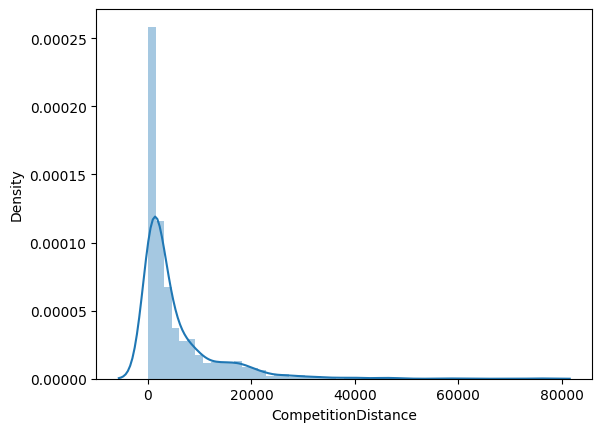

In [16]:
# Ploting the distribution plot of CompetitionDistance.
sns.distplot(Store_df.CompetitionDistance)

#### As the distribution is skewed here, it is wise to replace the Null values with Median.


In [17]:
# Filling the null values with the median value of the CompetitonDistance.
Store_df['CompetitionDistance'].fillna(Store_df.CompetitionDistance.median(), inplace= True)

In [18]:
#  Checking the null value.
Store_df.isna().sum()

Store                  0
StoreType              0
Assortment             0
CompetitionDistance    0
Promo2                 0
dtype: int64

In [19]:
# Various types of store counts.
Store_df.StoreType.value_counts()

a    602
d    348
c    148
b     17
Name: StoreType, dtype: int64

### Checking the StoreType Column:


---



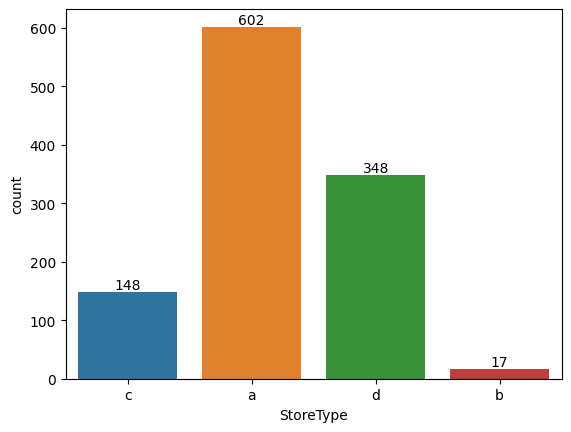

In [20]:
# Let's check the store type column.
fig= sns.countplot(x= 'StoreType', data= Store_df)

for i in fig.containers:
    fig.bar_label(i)

## Store type 'a' has highest stote count followed by 'd'. While 'b' has the lowest store count.

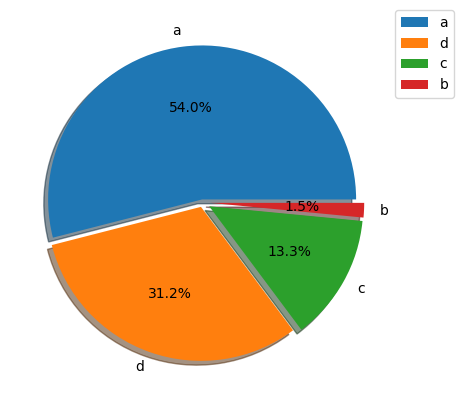

In [21]:
# Let's check it with a pie chart.
plt.figure(figsize=(10,5))
explode= [0.02, 0.03, 0.05,0.05]
plt.pie(Store_df['StoreType'].value_counts(), labels= Store_df.StoreType.value_counts().index, startangle=0, autopct= '%1.1f%%', shadow= True, explode= explode)
plt.legend(bbox_to_anchor= (1,1), loc= 'upper left', borderaxespad=0)
plt.show()

## Here we can see that type-a store type is maximum (about 54%) in our data set followed by type-d (about 31%).

## While type-b store types is comparatively less (only 1.5%).

### Pairplot of Columns wrt StoreType:


---



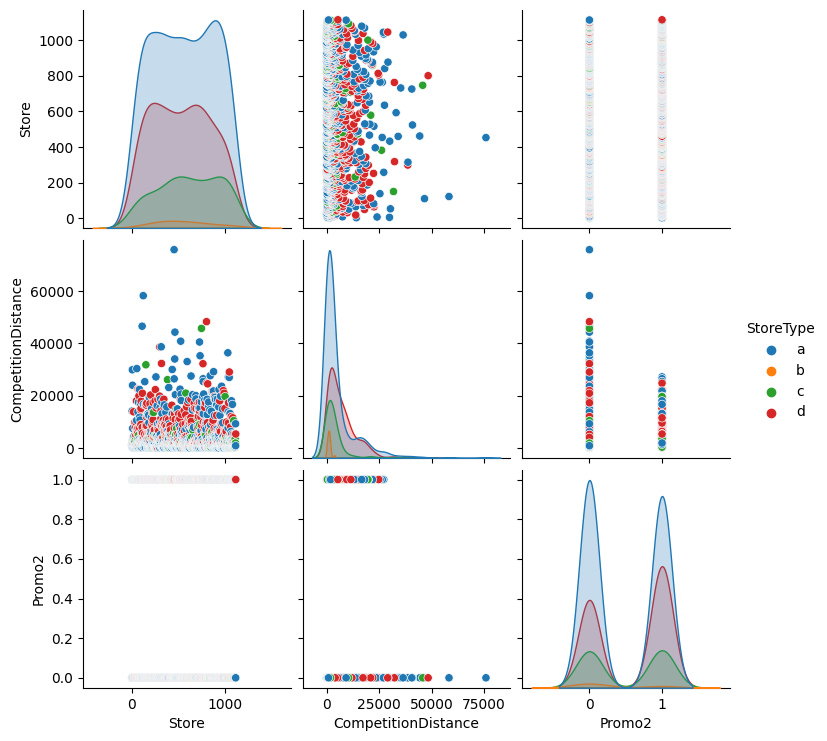

In [22]:
# Let's use pairplot for StoreType to check pairwise relationships between variables within a dataset.
fig= sns.pairplot(Store_df, hue= 'StoreType', hue_order=['a', 'b', 'c', 'd'])

## Here we can see that most of the stores are located in 20000 meter range. So we can say that cometetion is high over here.

### Checking StoreType wrt Assortment Types:


---



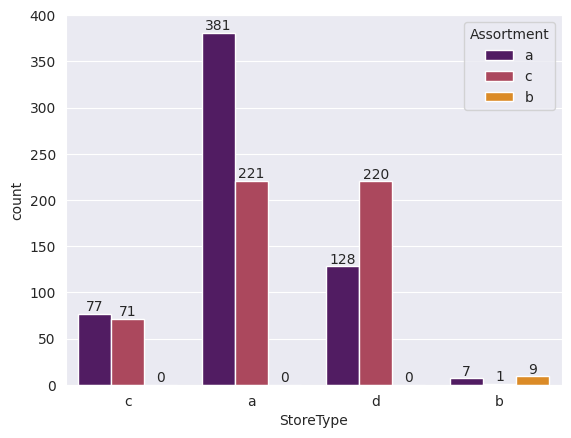

In [23]:
# Let's plot assortment type count with respect to store type.
sns.set_style('darkgrid')
store_types= sns.countplot(x= 'StoreType', hue= 'Assortment', data= Store_df, palette= 'inferno')

for i in store_types.containers:
    store_types.bar_label(i)

## **From above plot we can see that:**
### In store type- c & a, assortment type-a is more compared to others.
### But in store type-d, assortment type-c is more compared to others.
### In each store type, assortment type-b is comparatively less.

## **Exploratory Data Analysis on rossmann_df**

In [24]:
# rossmann_df First Look.
rossmann_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [25]:
# Shape of rossmann_df
rossmann_df.shape

(1017209, 9)

In [26]:
# List of name of the columns.
rossmann_df.columns.tolist()

['Store',
 'DayOfWeek',
 'Date',
 'Sales',
 'Customers',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday']

In [27]:
# rossmann_df information.
rossmann_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [28]:
# rossmann_df description.
rossmann_df.describe(include= 'all')

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1.017209e+06
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,2015-07-31,NaN,NaN,NaN,NaN,0,NaN
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,855087,NaN
mean,5.584297e+02,3.998341e+00,NaN,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,NaN,1.786467e-01
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,NaN,3.830564e-01
min,1.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00
25%,2.800000e+02,2.000000e+00,NaN,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
50%,5.580000e+02,4.000000e+00,NaN,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
75%,8.380000e+02,6.000000e+00,NaN,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,NaN,0.000000e+00


In [29]:
# Checking the number of duplicates.
len(rossmann_df[rossmann_df.duplicated()])

0

In [30]:
# Total count of Null values.
rossmann_df.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

### Here we can see that there is no Null values present in the data set.

<Axes: xlabel='Sales', ylabel='Density'>

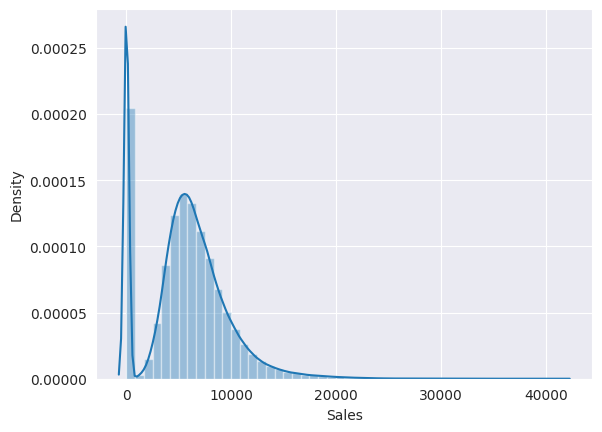

In [31]:
# Let's check the Sales column.
sns.distplot(rossmann_df.Sales)

## Here we can see that the Sales column is Right skewed.


In [32]:
# Let's convert the Dtype of column Date.
rossmann_df['Date']= pd.to_datetime(rossmann_df.Date)

In [33]:
# Let's extract Date, Month, Year from Date column.
rossmann_df['Day']= rossmann_df['Date'].apply(lambda x: x.day)
rossmann_df['Month']= rossmann_df['Date'].apply(lambda x: x.month)
rossmann_df['Year']= rossmann_df['Date'].apply(lambda x: x.year)

In [34]:
rossmann_df.head(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Day,Month,Year
0,1,5,2015-07-31,5263,555,1,1,0,1,31,7,2015
1,2,5,2015-07-31,6064,625,1,1,0,1,31,7,2015


In [35]:
# Let's check no of unique stores present in the data set.
rossmann_df.Store.nunique()

1115

In [36]:
# Let's check the starting and Final date of our data set.

print("Starting Date is: {0}".format(rossmann_df.Date.min()))
print("Final Date is: {0}".format(rossmann_df.Date.max()))
print("So there is {0} of Data.".format(rossmann_df.Date.max()-rossmann_df.Date.min()))

Starting Date is: 2013-01-01 00:00:00
Final Date is: 2015-07-31 00:00:00
So there is 941 days 00:00:00 of Data.


### Checking the Sales Monthwise of each Year:


---



In [37]:
# Unique years present in the data.
rossmann_df.Year.unique()

array([2015, 2014, 2013])

In [38]:
# Let's get the net sales per month for each year.
sales_per_month= rossmann_df.groupby(['Year', 'Month'])['Sales'].median().reset_index()


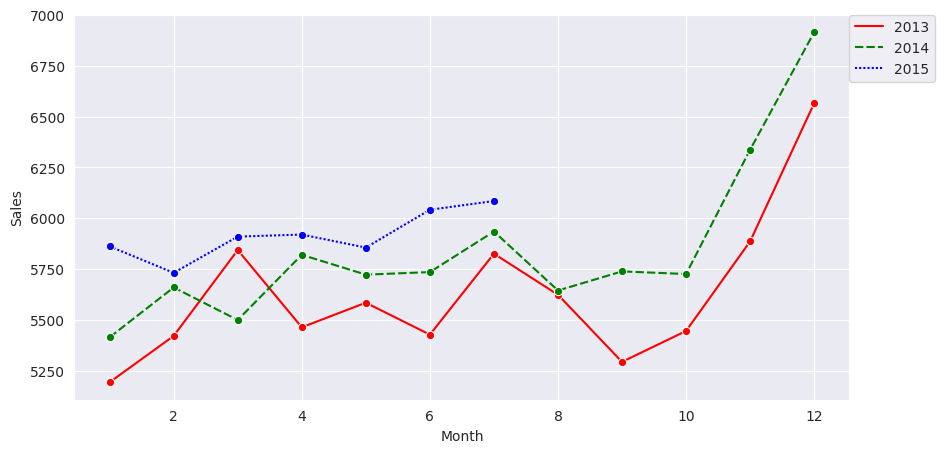

In [39]:
# Ploting the net sales per month for each year.
color= ['r', 'g', 'b']
plt.figure(figsize=(10,5))
sns.lineplot(x= 'Month', y= 'Sales', data= sales_per_month, hue= 'Year', palette= color, marker='o', style= 'Year')
plt.legend(bbox_to_anchor= (1,1), loc= 'upper left', borderaxespad=0)

### From above plot we can see that in the year of 2015 the sales run only upto the mopnth of July.

### We can also see that in the month of **October to December**, the sale are increasing exponentially.

### From further research we got that the reason behind the increase in sales, is **the upcoming winter.**

### Checking Correlation between Sales and Customers:


---



<Axes: >

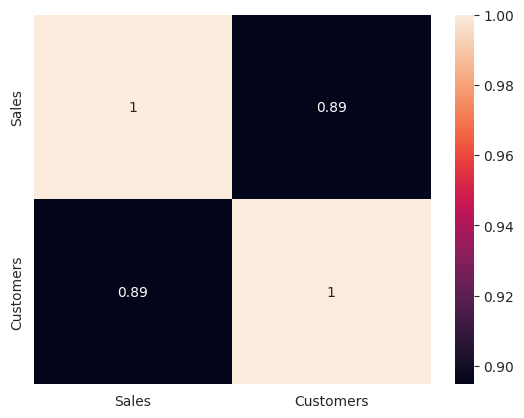

In [40]:
# Let's check the relation between Sales and Customers columns.
sns.heatmap(rossmann_df[['Sales', 'Customers']].corr(), annot= True)

## Here we can see that customers and sales are highly correlated.

### Checking Store Open status for each day of week:


---



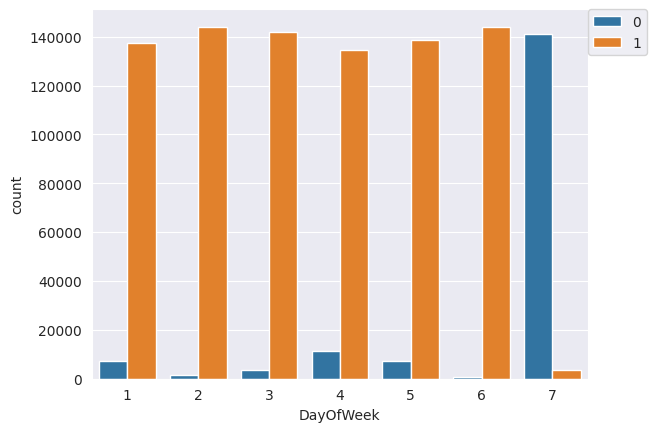

In [41]:
# Let's check the how many days and how many stores are open in a week.
sns.countplot(x= rossmann_df.DayOfWeek, hue= rossmann_df.Open)
plt.legend(bbox_to_anchor= (1,1), loc= 'upper left', borderaxespad=0)

### Here we can clearly see that most of the stores are closed on Sundays.

### Sales wrt Promo:


---



<Axes: xlabel='Promo', ylabel='Sales'>

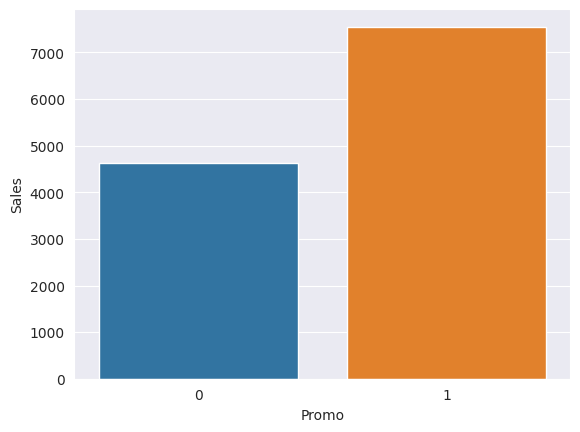

In [42]:
# Let's check the sales when promo is running and when not.
sales_wrt_promo = pd.DataFrame(rossmann_df.groupby('Promo').agg({'Sales':'median'})).reset_index()
sns.barplot(x= 'Promo', y= 'Sales', data= sales_wrt_promo)

## From above plot, we concluded that the sales when promo is running is high compared to the sales when promo is not running.

### Sales wrt SchoolHoliday:


---



In [43]:
# Schoolholiday unique value counts.
rossmann_df.SchoolHoliday.value_counts()

0    835488
1    181721
Name: SchoolHoliday, dtype: int64

In [44]:
# Let's check the impact of SchoolHoliday on Sales.
schoolholiday_vs_sale= rossmann_df.groupby('SchoolHoliday')['Sales'].median()   # As the sales data skewed, we are taking the median.
schoolholiday_vs_sale

SchoolHoliday
0    5642.0
1    6197.0
Name: Sales, dtype: float64

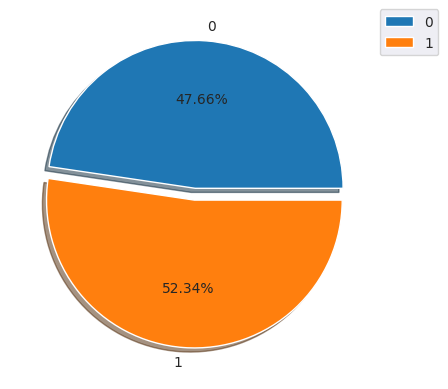

In [45]:
#  Ploting the impact of SchoolHoliday on Sales.
explode=[0.04, 0.04]
plt.pie(schoolholiday_vs_sale, labels= schoolholiday_vs_sale.index, autopct= '%1.2f%%', shadow= True, explode= explode)
plt.legend(bbox_to_anchor= (1,1), loc= 'upper left', borderaxespad=0)

## Here we can see that SchoolHoliday have some impact on sales.

## From above pie chart we saw that during SchooHoliday sales are more compared to the days where there is no SchoolHoliday.

### Sales wrt StateHoliday:


---



In [46]:
# Let's check StateHoliday column
rossmann_df.StateHoliday.value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

### We can see that that there are categorical variables in StateHoliday column.

### So we will change that column to proper numerical column with valid reasoning.

In [47]:
# Creating a function to convert categorical values to numerical values.
def change_type(arg):
  if arg==0:
    arg=0
  elif arg=='0':
    arg= 0
  else:
    arg=1
  return arg

In [48]:
# Let's use the above function to change the data type of StateHoliday column.
rossmann_df.StateHoliday= rossmann_df.StateHoliday.apply(lambda x: change_type(x) )

In [49]:
# Let's check StateHoliday column again.
rossmann_df.StateHoliday.value_counts()

0    986159
1     31050
Name: StateHoliday, dtype: int64

In [50]:
stateholiday_vs_sale= rossmann_df.groupby(['StateHoliday', 'Open'])['Sales'].median().reset_index()
stateholiday_vs_sale

,StateHoliday,Open,Sales
0,0,0,0.0
1,0,1,6368.0
2,1,0,0.0
3,1,1,7649.5


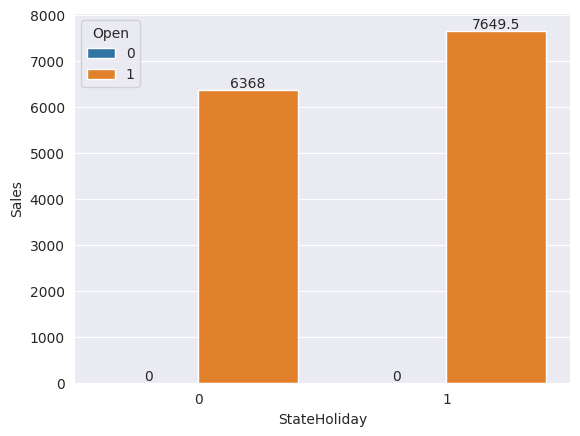

In [51]:
# ploting the Bar-chart of stateHoliday and sales.
ax= sns.barplot(x= stateholiday_vs_sale.StateHoliday, y= stateholiday_vs_sale.Sales, hue= stateholiday_vs_sale.Open)
for i in ax.containers:
    ax.bar_label(i)

## Here we can see that in the days when there is StateHoliday, the sales are more compared to the days when there is no StateHoliday.

## Let's merge Store_df and rossmann_df.

In [52]:
# Merging 2 data frames.
df= pd.merge(Store_df, rossmann_df, how= 'right', on= 'Store')

In [53]:
# Let's rearrange the columns by reindexing it.
indexes= ['Store', 'StoreType', 'Assortment', 'Open', 'SchoolHoliday', 'StateHoliday', 'CompetitionDistance',
        'Promo', 'Promo2', 'Customers', 'Date','Day', 'Month', 'Year', 'DayOfWeek',  'Sales']

In [54]:
df= df.reindex(columns= indexes)

## **Exploratory Data Analysis on Merged Data Frame i.e df.**

In [55]:
# First look of the merged dataset.
df.head()

,Store,StoreType,Assortment,Open,SchoolHoliday,StateHoliday,CompetitionDistance,Promo,Promo2,Customers,Date,Day,Month,Year,DayOfWeek,Sales
0,1,c,a,1,1,0,1270.0,1,0,555,2015-07-31,31,7,2015,5,5263
1,2,a,a,1,1,0,570.0,1,1,625,2015-07-31,31,7,2015,5,6064
2,3,a,a,1,1,0,14130.0,1,1,821,2015-07-31,31,7,2015,5,8314
3,4,c,c,1,1,0,620.0,1,0,1498,2015-07-31,31,7,2015,5,13995
4,5,a,a,1,1,0,29910.0,1,0,559,2015-07-31,31,7,2015,5,4822


In [56]:
# Let's create a column that contains the average spending done by customers.
df['Avg_sales_per_customer']= round(df.Sales / df.Customers, 2)

In [57]:
#  Checking the Head of the dataset.
df.head(2)

,Store,StoreType,Assortment,Open,SchoolHoliday,StateHoliday,CompetitionDistance,Promo,Promo2,Customers,Date,Day,Month,Year,DayOfWeek,Sales,Avg_sales_per_customer
0,1,c,a,1,1,0,1270.0,1,0,555,2015-07-31,31,7,2015,5,5263,9.48
1,2,a,a,1,1,0,570.0,1,1,625,2015-07-31,31,7,2015,5,6064,9.70


### Checking Store, Sales and Customers wrt StoreType:


---



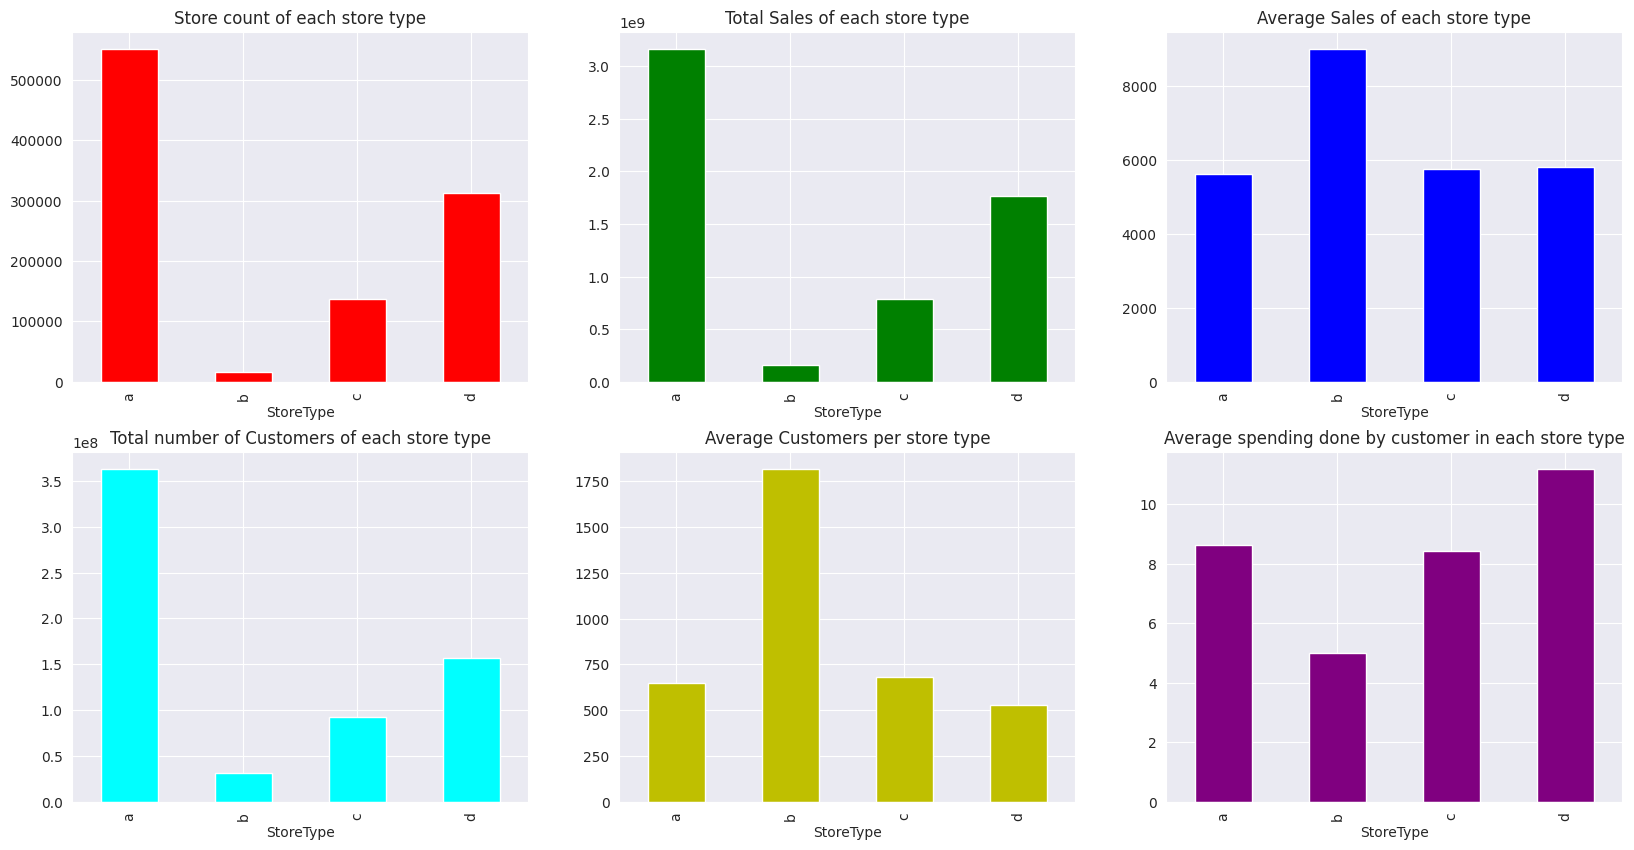

In [58]:
#  ploting various subplot showing the barplot between Store type and the other columns.
f, ax = plt.subplots(2, 3, figsize = (20,10))

df.groupby("StoreType")["Store"].count().plot(kind = "bar", ax = ax[0, 0], color= 'r', title = "Store count of each store type")
df.groupby("StoreType")["Sales"].sum().plot(kind = "bar", ax = ax[0,1], color= 'g', title = "Total Sales of each store type")
df.groupby("StoreType")["Sales"].median().plot(kind = "bar", ax = ax[0,2], color= 'b', title = "Average Sales of each store type")
df.groupby("StoreType")["Customers"].sum().plot(kind = "bar", ax = ax[1,0], color= 'cyan', title = "Total number of Customers of each store type")
df.groupby("StoreType")["Customers"].median().plot(kind = "bar", ax = ax[1,1], color= 'y', title = "Average Customers per store type")
df.groupby("StoreType")["Avg_sales_per_customer"].median().plot(kind = "bar", ax = ax[1,2], color= 'purple', title = "Average spending done by customer in each store type")

plt.subplots_adjust(hspace = 0.2, wspace= 0.2)
plt.show()

## Observations:
> The count of store type 'a' is maximun while store type 'b' is minimum.

> The total sale of store type 'a' is the highest while the average sale of store type 'b' is the highest compared to others.

> The total customers count of store type 'a' is the highest while the average customers count of store type 'b' is the highest.

> The average speding done by customers in store type 'd' is the highest.

### Sales vs Promo and Promo2 for each year:


---



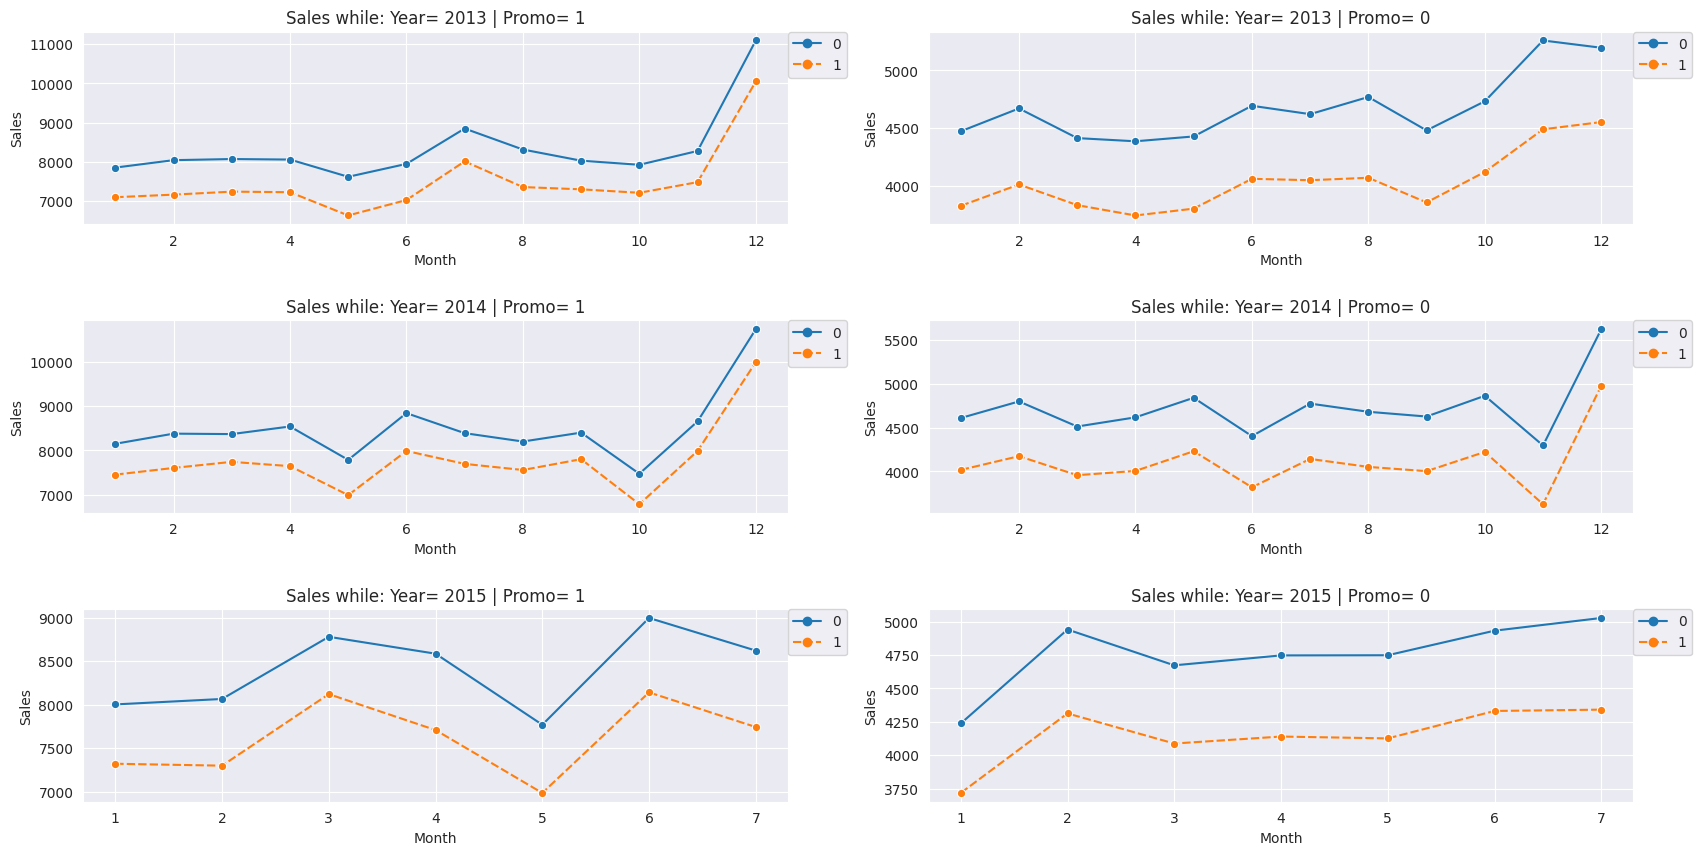

In [59]:
# Let's check the sales with respect to promo and promo2 for each year.
index= 1
plt.figure(figsize= (20,10))
for i in sorted(df.Year.unique().tolist()):
    for j in df.Promo.unique().tolist():
      plt.subplot(3,2,index)
      index +=1
      yearwise_data= df[df['Year']== i]
      promowise_data= yearwise_data[yearwise_data['Promo']== j]
      sns.lineplot(x= 'Month', y= 'Sales', data= promowise_data, hue= 'Promo2', ci= None, markers= 'o', style= 'Promo2')
      plt.title(f"Sales while: Year= {i} | Promo= {j}")
      plt.legend(bbox_to_anchor= (1,1), loc= 'upper left', borderaxespad=0)
      plt.subplots_adjust(hspace = 0.5, wspace= 0.2)

### From above plots we can see that the sales are high while the promo is running but promo2 has no such effect.

### Sales vs DayOfWeek wrt Promo:


---



<Axes: xlabel='DayOfWeek', ylabel='Sales'>

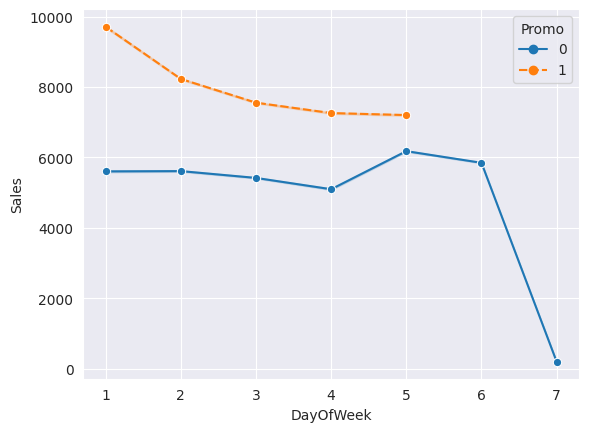

In [60]:
# Let's see the sales with respect to DayofWeek.
sns.lineplot(x= 'DayOfWeek', y= 'Sales', data= df, hue= 'Promo', markers= 'o', style= 'Promo')

### From above plot we can se that, the sales are decreasing in weekends.

### We can also see that the promo is running only in week days.

### Yearly Sales Trend:


---



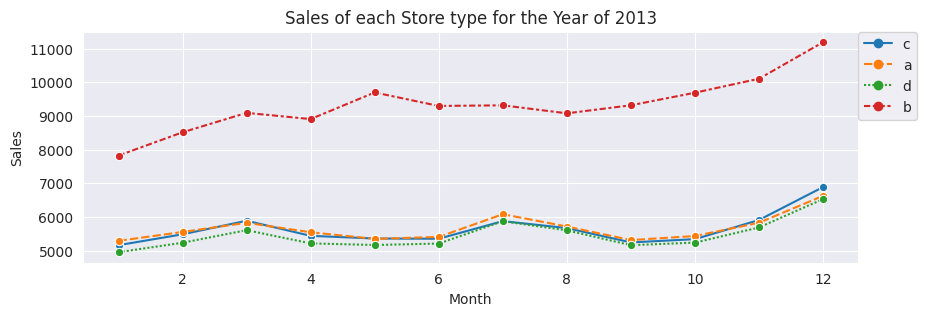

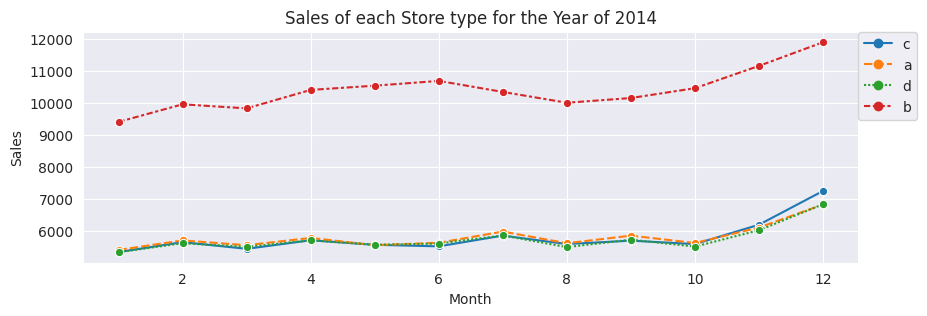

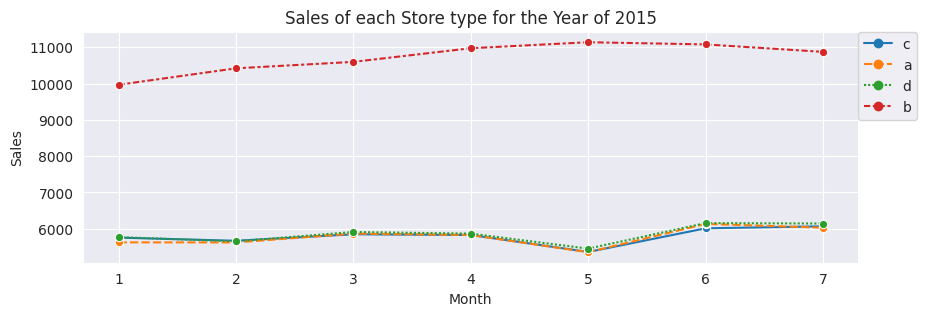

In [61]:
# Let's see the sale trend yearly.
for i in sorted(df.Year.unique().tolist()):
  plt.figure(figsize= (10,3))
  yearwise_df= df[df['Year']==i]
  sns.lineplot(data = yearwise_df, x = "Month", y = "Sales", hue = "StoreType", ci= None, style= 'StoreType', markers= 'o')
  plt.title(f'Sales of each Store type for the Year of {i}')
  plt.legend(bbox_to_anchor= (1,1), loc= 'upper left', borderaxespad=0)
  plt.show()

### From above plot we can see that the Sales of Store type 'b' remains high through out the year for each year.

### For other Store types, the sales remain almost same through out the year.

### CompetitionDistance vs Sales and Customers Count:


---



In [62]:
# Let's see the impact of distance on the sales and customers count.
# Categorizing the distances into 6 types.
df["CompetitionDistance_category"] = pd.cut(df["CompetitionDistance"], 6)
df.sample(5, random_state= 1)

,Store,StoreType,Assortment,Open,SchoolHoliday,StateHoliday,CompetitionDistance,Promo,Promo2,Customers,Date,Day,Month,Year,DayOfWeek,Sales,Avg_sales_per_customer,CompetitionDistance_category
985837,963,a,c,1,0,0,23620.0,0,0,1017,2013-01-29,29,1,2013,2,9609,9.45,"(12660.0, 25300.0]"
462798,859,c,a,1,0,0,21770.0,0,0,668,2014-05-13,13,5,2014,2,6670,9.99,"(12660.0, 25300.0]"
756833,534,d,a,1,1,0,1200.0,0,1,422,2013-08-22,22,8,2013,4,4967,11.77,"(-55.84, 12660.0]"
83457,948,b,b,1,0,0,1430.0,1,0,2169,2015-05-18,18,5,2015,1,8301,3.83,"(-55.84, 12660.0]"
250151,819,a,c,1,0,0,720.0,1,0,631,2014-12-17,17,12,2014,3,8889,14.09,"(-55.84, 12660.0]"


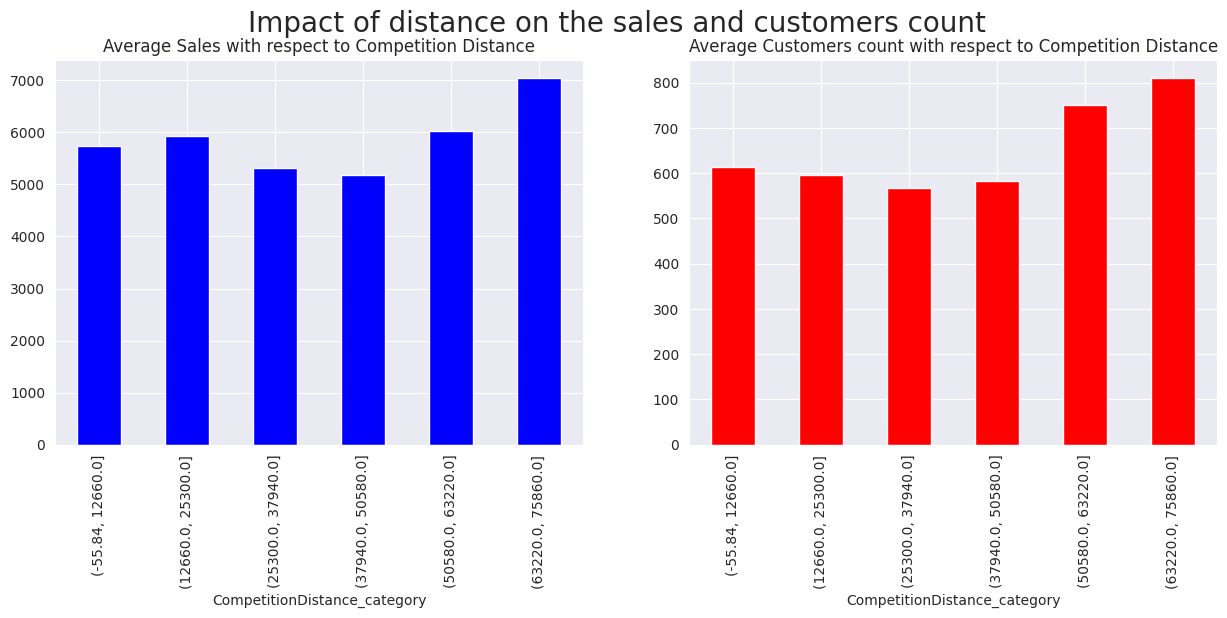

In [63]:
fig, ax = plt.subplots(1,2, figsize = (15,5))

df.groupby(by = "CompetitionDistance_category").Sales.median().plot(kind = "bar", color= 'b',
                                                                  title = "Average Sales with respect to Competition Distance", ax = ax[0])
df.groupby(by = "CompetitionDistance_category").Customers.median().plot(kind = "bar", color= 'r',
                                                                      title = "Average Customers count with respect to Competition Distance", ax = ax[1])
fig. suptitle("Impact of distance on the sales and customers count", fontsize=20)
plt.show()


### Here we can see that with increase in Competition Distance, the average Sale and Customer Count is increasing.

In [64]:
# Dropping the columns that is not necessary now and further.
df.drop(['Avg_sales_per_customer','CompetitionDistance_category'],axis=1,inplace=True)

In [65]:
df.head(2)

,Store,StoreType,Assortment,Open,SchoolHoliday,StateHoliday,CompetitionDistance,Promo,Promo2,Customers,Date,Day,Month,Year,DayOfWeek,Sales
0,1,c,a,1,1,0,1270.0,1,0,555,2015-07-31,31,7,2015,5,5263
1,2,a,a,1,1,0,570.0,1,1,625,2015-07-31,31,7,2015,5,6064


# **CONCLUSION FROM EXPLORATORY DATA ANALYSIS:**

> ### 1. Store type-a has highest store count about 54% while store type-b has the lowest about 1.5%.

> ### 2. Competition within 20000 meter is high and Average Sales and Customers Count is increasing as the Competition distance is increasing.

> ### 3. Out of three assortment types, type-a assortment is the highest while type-b is the lowest.

> ### 4. Sales are increasing exponentially from the month of October to December. That might be for the upcoming winter.

> ### 5. Sales are highly correlated with number of customers.

> ### 6. Most of the stores are closed on Sundays and the Sales are decreasing in weekwnds.

> ### 7. Promo is running only on week days. The sales are high when the Promo is running while the Promo2 has no such effect on Sales.

> ### 8. During School Holidays and State Holidays the sales are high.

> ### 9. Total Sales and Customers count of store type-a is highest while the average Sales and Customers count of Store type-b is highest.

> ### 10. Average Customer spending is more in store type-d.

## **Data Preparation**

<Axes: >

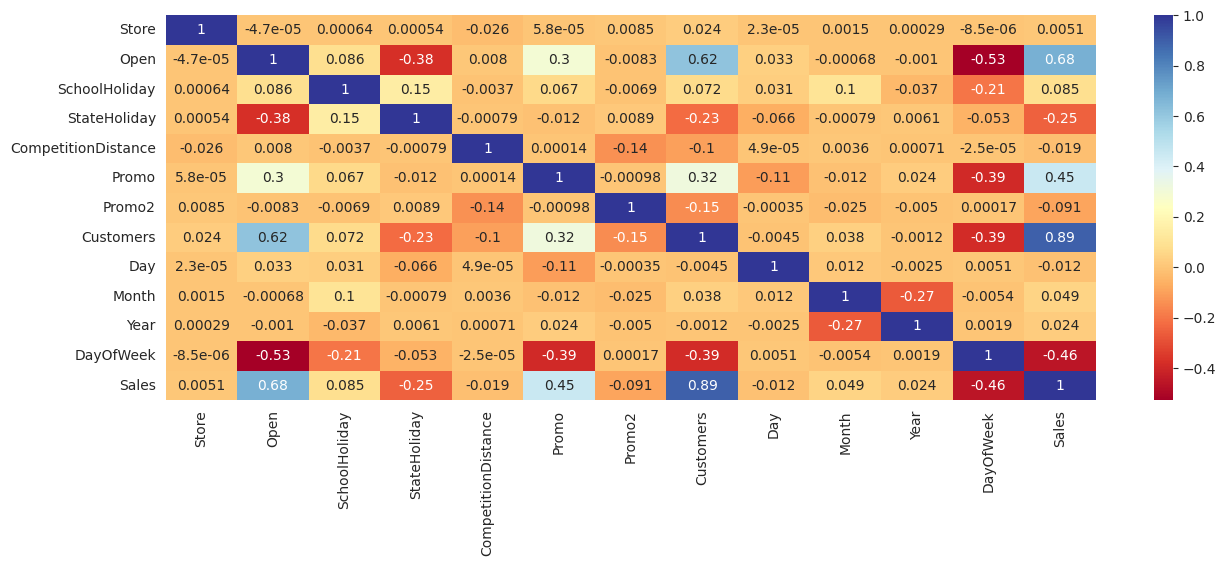

In [66]:
# Let's check the correlation between columns.
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(), annot= True, cmap= 'RdYlBu')

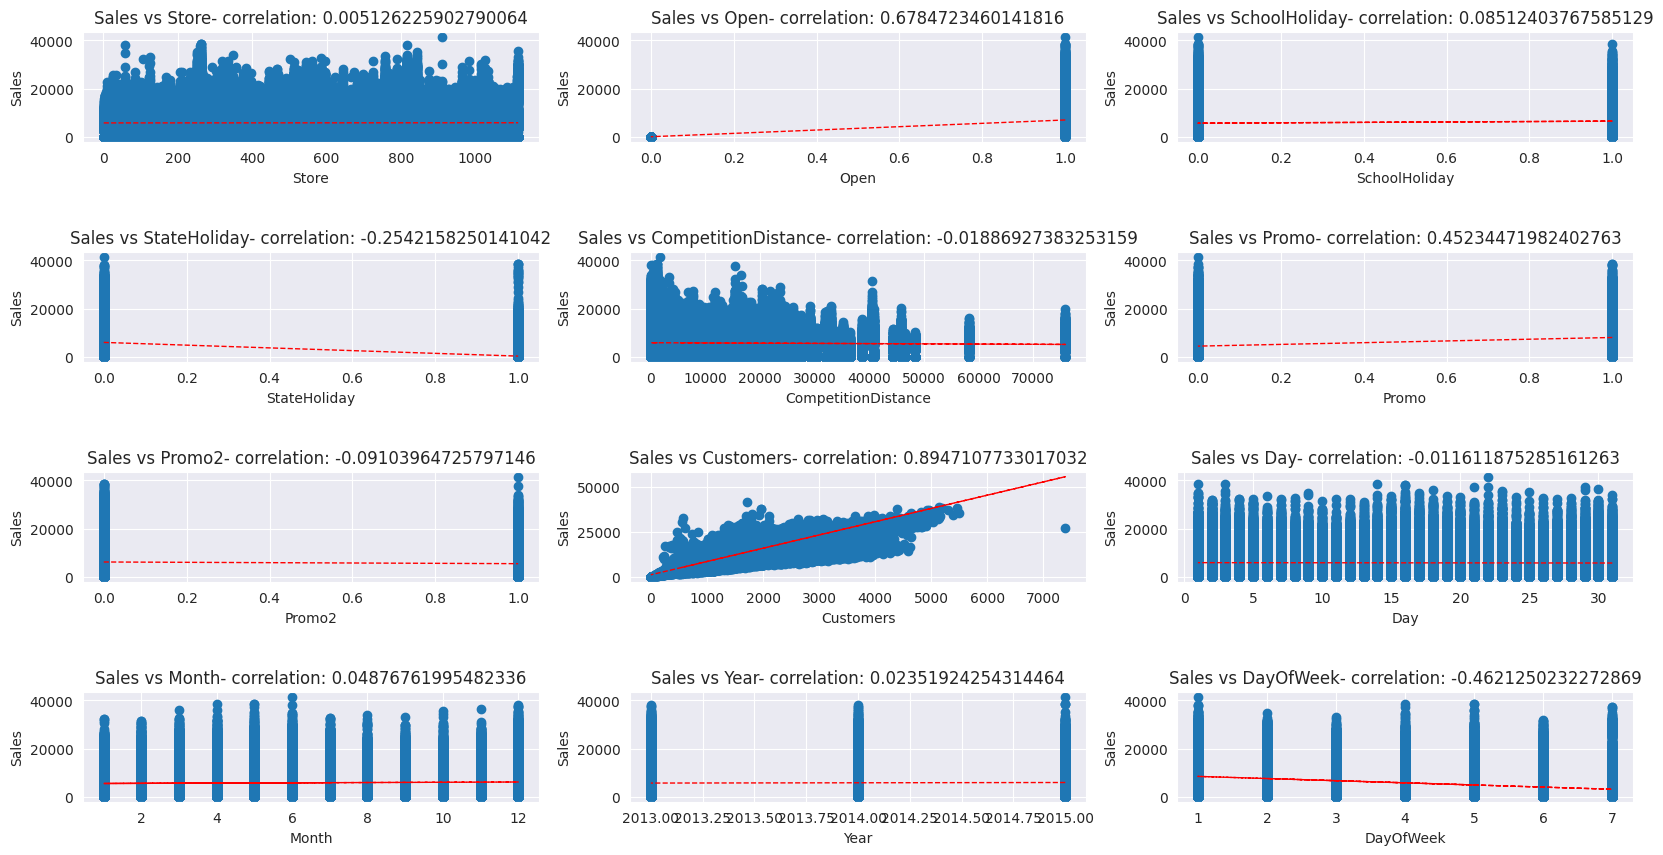

In [67]:
# Getting the correlation of each column with Sales and fitting a polynomial line.
index= 1
plt.figure(figsize= (20,10))
for col in df.select_dtypes(np.number).columns.tolist()[:-1]:
    plt.subplot(4,3,index)
    index +=1
    ax = fig.gca()
    feature = df[col]
    label = df['Sales']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Sales')
    plt.title('Sales vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['Sales'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)
    plt.subplots_adjust(hspace = 1, wspace= 0.2)

In [68]:
# Unique value counts of 'Sales' Column.
df.Sales.value_counts()

0        172871
5674        215
5558        197
5483        196
6214        195
          ...  
23806         1
24183         1
20651         1
25083         1
23303         1
Name: Sales, Length: 21734, dtype: int64

### Here we can see that there are lots of observations with **Zeros** which doesn't add value to data in Sales column.

### So it is wise to remove those **Zeros.**

In [69]:
# Taking the Sales with values greater than 0.
df= df[df.Sales > 0]

### As we extracted date, month and year from date column, there is no need for date column.

In [70]:
# Removing Date column
df.drop('Date', axis= 1, inplace= True)

In [71]:
# Let's create a function to check multicollinearity.
def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [72]:
# Let's check multicollinearity of columns.
calc_vif(df[[i for i in df.describe().columns if i not in ['Sales']]])

,variables,VIF
0,Store,1.001826e+00
1,Open,7.244997e+06
2,SchoolHoliday,1.035987e+00
3,StateHoliday,1.003050e+00
4,CompetitionDistance,1.057365e+00
5,Promo,1.142318e+00
6,Promo2,1.078983e+00
7,Customers,1.128616e+00
8,Day,1.019182e+00
9,Month,1.095483e+00


### Here the only column **Open** have high multicollinearity. So let's remove that column.

In [73]:
# Let's check multicollinearity of columns again.
calc_vif(df[[i for i in df.describe().columns if i not in ['Sales', 'Open']]])

,variables,VIF
0,Store,4.019910
1,SchoolHoliday,1.284584
2,StateHoliday,1.004126
3,CompetitionDistance,1.573443
4,Promo,2.062271
5,Promo2,2.151959
6,Customers,5.208097
7,Day,4.408370
8,Month,4.164315
9,Year,25.064136


### Here the only column **Year** have high multicollinearity. So let's remove that column too.

In [74]:
# Let's check multicollinearity of columns again.
calc_vif(df[[i for i in df.describe().columns if i not in ['Sales', 'Open', 'Year']]])

,variables,VIF
0,Store,3.570702
1,SchoolHoliday,1.271300
2,StateHoliday,1.003912
3,CompetitionDistance,1.470652
4,Promo,1.891335
5,Promo2,1.922434
6,Customers,4.194729
7,Day,3.671444
8,Month,3.701626
9,DayOfWeek,4.148935


In [75]:
# Taking those features with multicollinearity in the range of 0 to 10.
numerical_features= ['Store','SchoolHoliday','StateHoliday','CompetitionDistance','Promo','Promo2','Customers','Day','Month','DayOfWeek']

In [76]:
# Removing the columns: Open and Year
df.drop(['Open', 'Year'], axis= 1, inplace= True)

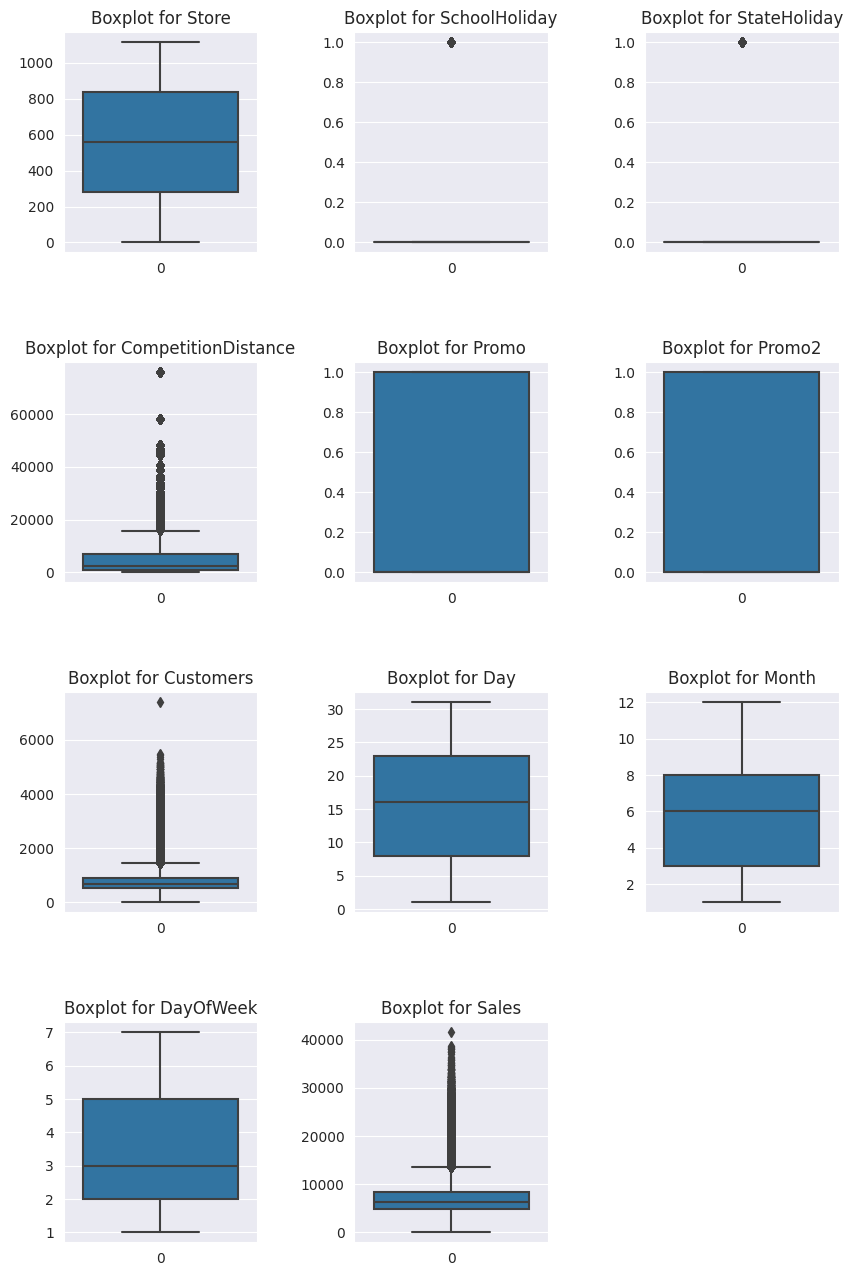

In [77]:
# Let's check the outliers in our Data Set by boxplot.
index= 1
desired_column= numerical_features.copy()
desired_column.append('Sales')
plt.figure(figsize= (10,20))
for i in desired_column:
  plt.subplot(5,3,index)
  index +=1
  num_col_data= df[i]
  sns.boxplot(df[i])
  plt.title(f"Boxplot for {i}")
  plt.subplots_adjust(hspace = 0.5, wspace= 0.5)

### Here we can see that there are major outliers in the column of Customers and Sales.

In [78]:
# Creating a Function for removing outliers.
def remove_outliers(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3-q1
    lower_fence  = q1-1.5*iqr
    upper_fence = q3+1.5*iqr
    revised_df = data.loc[(data[column] > lower_fence) & (data[column] < upper_fence)]
    return revised_df

In [79]:
# Removing outliers from Sales Column y using that function.
df= remove_outliers(df, 'Sales')
df= remove_outliers(df, 'Customers')

In [80]:
df.head()

,Store,StoreType,Assortment,SchoolHoliday,StateHoliday,CompetitionDistance,Promo,Promo2,Customers,Day,Month,DayOfWeek,Sales
0,1,c,a,1,0,1270.0,1,0,555,31,7,5,5263
1,2,a,a,1,0,570.0,1,1,625,31,7,5,6064
2,3,a,a,1,0,14130.0,1,1,821,31,7,5,8314
4,5,a,a,1,0,29910.0,1,0,559,31,7,5,4822
5,6,a,a,1,0,310.0,1,0,589,31,7,5,5651


### Let's convert categorical variables into numerical variables by using dummies.

In [81]:
# Converting categorical variables into numerical variables.
new_df= pd.get_dummies(df, columns= ['StoreType','Assortment'])   # Creating new Data Frame for the Security of Original Data.

In [82]:
# First look of new data frame with dummies.
new_df.head()

,Store,SchoolHoliday,StateHoliday,CompetitionDistance,Promo,Promo2,Customers,Day,Month,DayOfWeek,Sales,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,1,1,0,1270.0,1,0,555,31,7,5,5263,0,0,1,0,1,0,0
1,2,1,0,570.0,1,1,625,31,7,5,6064,1,0,0,0,1,0,0
2,3,1,0,14130.0,1,1,821,31,7,5,8314,1,0,0,0,1,0,0
4,5,1,0,29910.0,1,0,559,31,7,5,4822,1,0,0,0,1,0,0
5,6,1,0,310.0,1,0,589,31,7,5,5651,1,0,0,0,1,0,0


## Now the **Data** is ready to be implemented in **Regression Analysis.**

#### Choosing Independant Variables(Features) and Target Variable.

In [83]:
# Choosing Independant Variables(Features).
x= new_df.drop(['Sales', 'Store'], axis= 1)
x.head()

,SchoolHoliday,StateHoliday,CompetitionDistance,Promo,Promo2,Customers,Day,Month,DayOfWeek,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,1,0,1270.0,1,0,555,31,7,5,0,0,1,0,1,0,0
1,1,0,570.0,1,1,625,31,7,5,1,0,0,0,1,0,0
2,1,0,14130.0,1,1,821,31,7,5,1,0,0,0,1,0,0
4,1,0,29910.0,1,0,559,31,7,5,1,0,0,0,1,0,0
5,1,0,310.0,1,0,589,31,7,5,1,0,0,0,1,0,0


In [84]:
# Choosing Target Variable.
y= new_df.Sales
y.head()

0    5263
1    6064
2    8314
4    4822
5    5651
Name: Sales, dtype: int64

### Using **train_test_split** to train and test the data.

In [85]:
# Using train_test_split on x and y.
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=0)

In [86]:
# Checking the shape of the train and test dataset.
print(f'x_train shape:{x_train.shape} | x_test shape:{x_test.shape}')
print(f'y_train shape:{y_train.shape} | y_test shape:{y_test.shape}')

x_train shape:(551640, 16) | x_test shape:(236418, 16)
y_train shape:(551640,) | y_test shape:(236418,)


## **IMPLIMENTING LINEAR REGRESSION**

In [87]:
# Applying Linear regression
reg= LinearRegression().fit(x_train, y_train)

In [88]:
# Checking regression co-efficient.
reg.coef_

array([ 2.91659928e+01, -4.40546536e+02,  2.48721541e-02,  1.00080198e+03,
        3.72663471e+02,  7.96862797e+00,  1.07150642e+00,  1.65767990e+01,
       -1.26965097e+01,  1.08536836e+02, -1.28089364e+03, -9.05169021e+01,
        1.26287370e+03,  1.01616939e+03, -2.29977667e+03,  1.28360728e+03])

In [89]:
# Checking the length of regression co-efficient.
len(reg.coef_)

16

In [90]:
# Checking Regression Intercept
reg.intercept_

-1446.5940667203286

In [91]:
# Checking regression Score for training data.
reg.score(x_train, y_train)

0.7783031864226007

In [92]:
# Checking regression Score for testing data.
reg.score(x_test, y_test)

0.7774273721084137

In [93]:
# Predicting on training data.
y_pred_train_lr= reg.predict(x_train)

In [188]:
# Checking MSE, RMSE AND R2 Score for Linear Regression.
MSE_lr_train = mean_squared_error(y_train, y_pred_train_lr)
print("MSE LINEAR TRAIN :" , MSE_lr_train)

RMSE_lr_train = np.sqrt(MSE_lr_train)
print("RMSE LINEAR TRAIN:" ,RMSE_lr_train)

r2_lr_train = r2_score(y_train,y_pred_train_lr)
print("R2 LINEAR TRAIN:" ,r2_lr_train)

MAPE_lr_train= mape(y_train,y_pred_train_lr) * 100
print("MAPE LINEAR TRAIN :",MAPE_lr_train,'%')

MSE LINEAR TRAIN : 1176204.106006097
RMSE LINEAR TRAIN: 1084.5294398982892
R2 LINEAR TRAIN: 0.7783031864226007
MAPE LINEAR TRAIN : 13.753695506823076 %


In [95]:
# Predicting on testing data.
y_pred_test_lr= reg.predict(x_test)

In [187]:
# Checking MSE, RMSE AND R2 Score for Linear Regression.
MSE_lr_test = mean_squared_error(y_test, y_pred_test_lr)
print("MSE LINEAR TEST :" , MSE_lr_test)

RMSE_lr_test = np.sqrt(MSE_lr_test)
print("RMSE LINEAR TEST:" ,RMSE_lr_test)

r2_lr_test = r2_score(y_test,y_pred_test_lr)
print("R2 LINEAR TEST:" ,r2_lr_test)

MAPE_lr_test= mape(y_test,y_pred_test_lr) * 100
print("MAPE LINEAR TEST:", MAPE_lr_test,'%')

MSE LINEAR TEST : 1177168.7708438265
RMSE LINEAR TEST: 1084.9740876370397
R2 LINEAR TEST: 0.7774273721084137
MAPE LINEAR TEST: 13.738849454261079 %


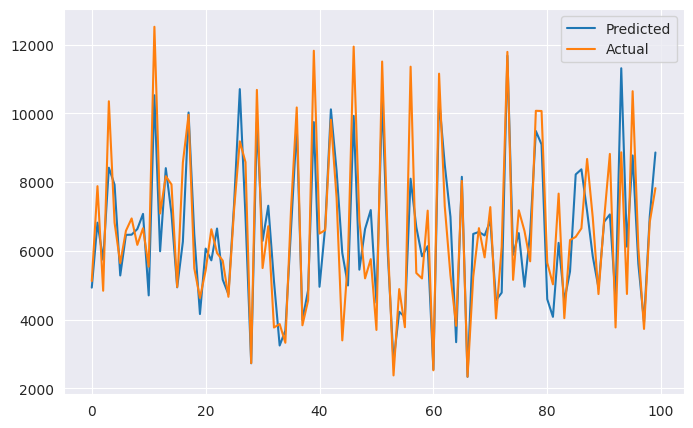

In [97]:
# Plotting 100 Predicted and Actual test data on a same plane.
plt.figure(figsize=(8,5))
plt.plot(y_pred_test_lr[:100])
plt.plot(np.array(y_test[:100]))
plt.legend(["Predicted","Actual"])
plt.show()

In [98]:
# Taking 100 Observations from Actual and Predicted data.
actual_data= y_test[:100]
predicted_data= y_pred_test_lr[:100]

# Creating a data frame using above data
regression_df= pd.DataFrame({'Actual':actual_data, 'Predicted':predicted_data})

In [99]:
regression_df.head()

,Actual,Predicted
968564,5122,4930.378764
638165,7882,6819.968488
754898,4840,5739.632523
587634,10351,8419.043959
98149,6822,7924.285668


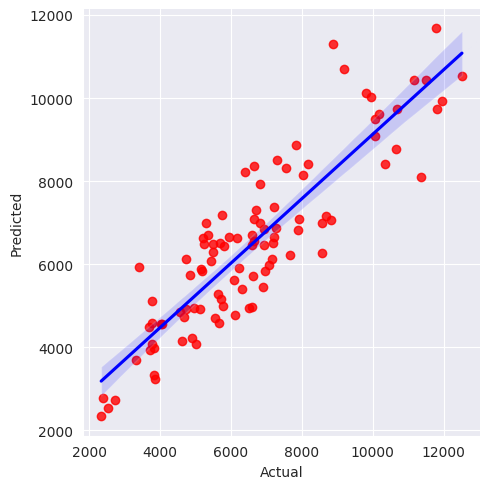

In [100]:
# Plotting the data on a plane and fitting a regression line.
sns.lmplot(x= 'Actual', y= 'Predicted', data= regression_df, scatter_kws={'color': 'red'}, line_kws= {'color': 'b'})

In [101]:
# Let's get the summary of the algorithm.
beta_df= sm.add_constant(x)     # Adding a constant to the data
model= sm.OLS(y, beta_df).fit()
prediction= model.predict(beta_df)

# Checking the summary.
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                 1.973e+05
Date:                Wed, 19 Jul 2023   Prob (F-statistic):               0.00
Time:                        08:20:06   Log-Likelihood:            -6.6260e+06
No. Observations:              788058   AIC:                         1.325e+07
Df Residuals:                  788043   BIC:                         1.325e+07
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -914.7068      6.848   -133.566      0.000    -928.129    -901.284
SchoolHoliday          27.8299      3.158      8.811      0.000      21.639      34.020
StateHoliday         -516.5942     45.698    -11.305      0.000    -606.161    -427.028
CompetitionDistance     0.0251      0.000    154.624      0.000       0.025       0.025
Promo                1001.6113      2.664    376.036      0.000     996.391    1006.832
Promo2                375.5778      2.554    147.029      0.000     370.571     380.584
Customers               7.9652      0.006   1408.555      0.000       7.954       7.976
Day                     1.1201      0.143      7.850      0.000       0.840       1.400
Month                  16.8247      0.373     45.121      0.000      16.094      17.556
DayOfWeek             -12.4479      0.753    -16.524      0.000     -13.924     -10.971
StoreType_a          -123.9965      5.899    -21.019      0.000    -135.559    -112.434
StoreType_b         -1500.4724     15.539    -96.561      0.000   -1530.929   -1470.016
StoreType_c          -320.3784      6.319    -50.700      0.000    -332.764    -307.993
StoreType_d          1030.1405      6.045    170.421      0.000    1018.293    1041.988
Assortment_a          714.9628      9.216     77.578      0.000     696.900     733.026
Assortment_b        -2608.5942     22.820   -114.311      0.000   -2653.321   -2563.867
Assortment_c          978.9246      9.348    104.724      0.000     960.603     997.246
==============================================================================
Omnibus:                    29400.334   Durbin-Watson:                   1.720
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            40031.207
Skew:                           0.392   Prob(JB):                         0.00
Kurtosis:                       3.777   Cond. No.                     8.24e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.09e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## **IMPLIMENTING LASSO REGRESSION**

In [102]:
# Fitting lasso regression model to the Train-Test data.
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

lasso.fit(x_train, y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [103]:
# Checking the Lasso Score.
lasso.score(x_train, y_train)

0.7783031864192108

In [104]:
# Checking Lasso Coefficient.
lasso.coef_

array([ 2.91652569e+01, -4.40406198e+02,  2.48721466e-02,  1.00080166e+03,
        3.72662878e+02,  7.96862708e+00,  1.07150457e+00,  1.65768005e+01,
       -1.26965521e+01, -7.91690171e+02, -2.18112459e+03, -9.90743172e+02,
        3.62646552e+02, -2.48021848e+02, -3.56392684e+03,  1.94158336e+01])

In [105]:
# Predicted Target variable using Lasso Regression.
y_pred_lasso_test= lasso.predict(x_test)

In [106]:
# Checking MSE, RMSE AND R2 Score for Lasso Regression.
MSE_lasso = mean_squared_error(y_test, y_pred_lasso_test)
print("MSE LASSO :" , MSE_lasso)

RMSE_lasso = np.sqrt(MSE_lasso)
print("RMSE LASSO:" ,RMSE_lasso)

r2_lasso = r2_score(y_test,y_pred_lasso_test)
print("R2 LASSO:" ,r2_lasso)

MSE LASSO : 1177168.8170536456
RMSE LASSO: 1084.9741089323954
R2 LASSO: 0.777427363371314


In [107]:
# Let's Cross validate for finding the best value of Alpha.
lasso = Lasso()
parameters = {'alpha': [1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=10)
lasso_regressor.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10,
                                   0.0014]},
             scoring='neg_mean_squared_error')

In [108]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print('\n')
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0014}



Using  {'alpha': 0.0014}  the negative mean squared error is:  -1176274.2773604826


In [109]:
# Predicted Train Target variable using Lasso Regression after Cross validation.
y_pred_lasso_cv_train = lasso_regressor.predict(x_train)

In [186]:
# Checking MSE, RMSE AND R2 Score for Lasso Regression after Cross Validation.
MSE_lasso_cv_train = mean_squared_error(y_train, y_pred_lasso_cv_train)
print("MSE LASSO CV TRAIN :" , MSE_lasso_cv_train)

RMSE_lasso_cv_train = np.sqrt(MSE_lasso_cv_train)
print("RMSE LASSO CV TRAIN :" ,RMSE_lasso_cv_train)

r2_lasso_cv_train = r2_score(y_train,y_pred_lasso_cv_train)
print("R2 LASSO CV TRAIN :" ,r2_lasso_cv_train)

MAPE_lasso_cv_train= mape(y_train,y_pred_lasso_cv_train) * 100
print("MAPE LASSO CV TRAIN:", MAPE_lasso_cv_train,'%')

MSE LASSO CV TRAIN : 1176204.1095310252
RMSE LASSO CV TRAIN : 1084.529441523385
R2 LASSO CV TRAIN : 0.7783031857582046
MAPE LASSO CV TRAIN: 13.75369477637991 %


In [111]:
# Predicted Test Target variable using Lasso Regression after Cross validation.
y_pred_lasso_cv_test = lasso_regressor.predict(x_test)

In [185]:
# Checking MSE, RMSE AND R2 Score for Lasso Regression after Cross Validation.
MSE_lasso_cv_test = mean_squared_error(y_test, y_pred_lasso_cv_test)
print("MSE LASSO CV TEST :" , MSE_lasso_cv_test)

RMSE_lasso_cv_test = np.sqrt(MSE_lasso_cv_test)
print("RMSE LASSO CV TEST :" ,RMSE_lasso_cv_test)

r2_lasso_cv_test = r2_score(y_test,y_pred_lasso_cv_test)
print("R2 LASSO CV TEST :" ,r2_lasso_cv_test)

MAPE_lasso_cv_test= mape(y_test,y_pred_lasso_cv_test) * 100
print("MAPE LASSO CV TEST:", MAPE_lasso_cv_test,'%')

MSE LASSO CV TEST : 1177169.4213025034
RMSE LASSO CV TEST : 1084.9743873946995
R2 LASSO CV TEST : 0.7774272491232475
MAPE LASSO CV TEST: 13.738854285490607 %


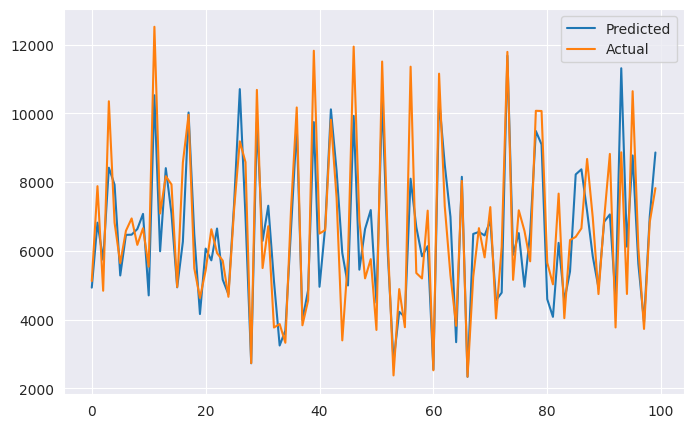

In [113]:
# Plotting the y Actual and Y predicted on a same plane
plt.figure(figsize=(8,5))
plt.plot(y_pred_lasso_cv_test[:100])
plt.plot(np.array(y_test[:100]))
plt.legend(["Predicted","Actual"])
plt.show()

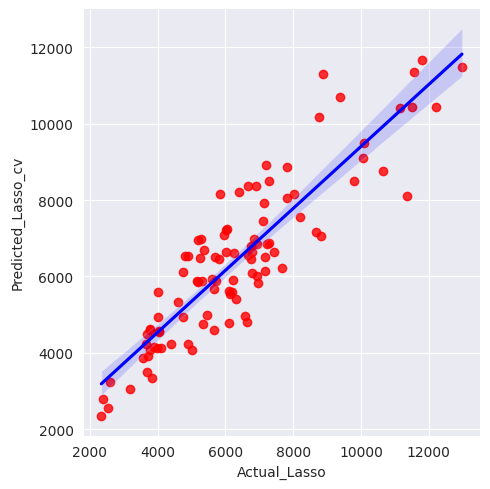

In [114]:
# Plotting the data on a plane and fitting a regression line
sns.lmplot(x= 'Actual_Lasso', y= 'Predicted_Lasso_cv', data= pd.DataFrame({'Actual_Lasso':y_test[50:150],
                                      'Predicted_Lasso_cv':y_pred_lasso_cv_test[50:150]}), scatter_kws={'color': 'red'}, line_kws= {'color': 'b'})

## **IMPLIMENTING RIDGE REGRESSION**

In [115]:
#Fitting Ridge regression model to the Train-test Data.
ridge  = Ridge(alpha=0.1)

ridge.fit(x_train,y_train)

Ridge(alpha=0.1)

In [116]:
# Ridge score of the training data.
ridge.score(x_train, y_train)

0.7783031864061055

In [117]:
# Predicted value of Target Variable using the Ridg Regression.
y_pred_ridge = ridge.predict(x_test)

In [118]:
# Checking MSE, RMSE AND R2 Score for Ridge Regression.
MSE_ridge  = mean_squared_error(y_test, y_pred_ridge)
print("MSE RIDGE :" , MSE_ridge)

RMSE_ridge = np.sqrt(MSE_ridge)
print("RMSE RIDGE :" ,RMSE_ridge)

r2_ridge = r2_score(y_test, y_pred_ridge)
print("R2 RIDGE :" ,r2_ridge)

MSE RIDGE : 1177168.809295745
RMSE RIDGE : 1084.974105357241
R2 RIDGE : 0.7774273648381353


In [119]:
# Hyperprarameter tuning
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=10)
ridge_regressor.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [120]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1}

Using  {'alpha': 1}  the negative mean squared error is:  -1176274.2550942781


In [121]:
# Predicted Test Target variable using Ridge Regression after Cross validation
y_pred_ridge_cv_train = ridge_regressor.predict(x_train)

In [184]:
# Checking MSE, RMSE AND R2 Score for Ridge Regression after Cross Validation.
MSE_ridge_cv_train  = mean_squared_error(y_train, y_pred_ridge_cv_train)
print("MSE RIDGE CV TRAIN :" , MSE_ridge_cv_train)

RMSE_ridge_cv_train = np.sqrt(MSE_ridge_cv_train)
print("RMSE RIDGE CV TRAIN :" ,RMSE_ridge_cv_train)

r2_ridge_cv_train = r2_score(y_train, y_pred_ridge_cv_train)
print("R2 RIDGE CV TRAIN :" ,r2_ridge_cv_train)

MAPE_ridge_cv_train= mape(y_train,y_pred_ridge_cv_train) * 100
print("MAPE RIDGE CV TRAIN:", MAPE_ridge_cv_train,'%')

MSE RIDGE CV TRAIN : 1176204.1147424236
RMSE RIDGE CV TRAIN : 1084.529443925993
R2 RIDGE CV TRAIN : 0.7783031847759342
MAPE RIDGE CV TRAIN: 13.753690555987678 %


In [123]:
# Predicted Train Target variable using Ridge Regression after Cross validation
y_pred_ridge_cv_test = ridge_regressor.predict(x_test)

In [183]:
# Checking MSE, RMSE AND R2 Score for Ridge Regression after Cross Validation.
MSE_ridge_cv_test  = mean_squared_error(y_test, y_pred_ridge_cv_test)
print("MSE RIDGE CV TEST :" , MSE_ridge_cv_test)

RMSE_ridge_cv_test = np.sqrt(MSE_ridge_cv_test)
print("RMSE RIDGE CV TEST :" ,RMSE_ridge_cv_test)

r2_ridge_cv_test = r2_score(y_test, y_pred_ridge_cv_test)
print("R2 RIDGE CV TEST :" ,r2_ridge_cv_test)

MAPE_ridge_cv_test= mape(y_test,y_pred_ridge_cv_test) * 100
print("MAPE RIDGE CV TEST:", MAPE_ridge_cv_test,'%')

MSE RIDGE CV TEST : 1177169.162587242
RMSE RIDGE CV TEST : 1084.9742681682558
R2 RIDGE CV TEST : 0.777427298039713
MAPE RIDGE CV TEST: 13.738852436812236 %


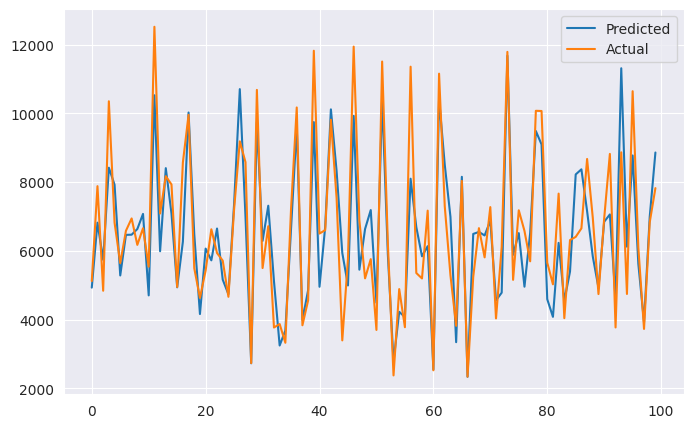

In [125]:
# Plotting the y Actual and Y predicted on a same plane
plt.figure(figsize=(8,5))
plt.plot(y_pred_ridge_cv_test[:100])
plt.plot(np.array(y_test[:100]))
plt.legend(["Predicted","Actual"])
plt.show()

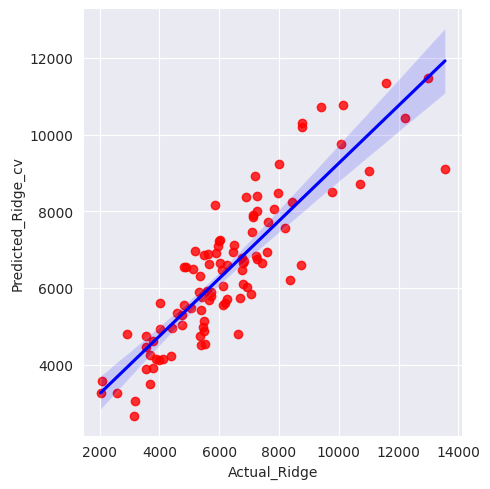

In [126]:
# Plotting the data on a plane and fitting a regression line
sns.lmplot(x= 'Actual_Ridge', y= 'Predicted_Ridge_cv', data= pd.DataFrame({'Actual_Ridge':y_test[100:200],
                                      'Predicted_Ridge_cv':y_pred_ridge_cv_test[100:200]}), scatter_kws={'color': 'red'}, line_kws= {'color': 'b'})

## **IMPLIMENTING ELASTICNET REGRESSION**

In [127]:
# Fitting ElasticNet regression model to the Train-test data.
# a * L1 + b * L2
# alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

elasticnet.fit(x_train,y_train)

ElasticNet(alpha=0.1)

In [128]:
# ElasticNet score for the training data.
elasticnet.score(x_train, y_train)

0.7650668756178312

In [129]:
# Predicted value of Target Variable using the ElasticNet Regression.
y_pred_en = elasticnet.predict(x_test)

In [130]:
# Checking MSE, RMSE AND R2 Score for ElasticNet Regression.
MSE_elasticnet  = mean_squared_error(y_test, y_pred_en)
print("MSE ElasticNet :" , MSE_elasticnet)

RMSE_elasticnet = np.sqrt(MSE_elasticnet)
print("RMSE ElasticNet :" ,RMSE_elasticnet)

r2_elasticnet = r2_score(y_test, y_pred_en)
print("R2 ElasticNet :" ,r2_elasticnet)

MSE ElasticNet : 1249596.5727196296
RMSE ElasticNet : 1117.8535560258463
R2 ElasticNet : 0.7637331197673896


In [131]:
# Cross Validating to find the best value of Alpha.
elastic = ElasticNet()
parameters = {'alpha': [1e-4,1e-3,1e-2,1e-1,0.005,0.05,1,5,10],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.005, 0.05, 1, 5,
                                   10],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [132]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0001, 'l1_ratio': 0.8}

Using  {'alpha': 0.0001, 'l1_ratio': 0.8}  the negative mean squared error is:  -1176285.8987390725


In [133]:
# Predicted Train Target variable using ElasticNet Regression after Cross validation.
y_pred_en_cv_train = elastic_regressor.predict(x_train)

In [181]:
# Checking MSE, RMSE AND R2 Score for ElasticNet Regression after Cross Validation.
MSE_elasticnet_cv_train  = mean_squared_error(y_train, y_pred_en_cv_train)
print("MSE ElasticNet CV TRAIN :" , MSE_elasticnet_cv_train)

RMSE_elasticnet_cv_train = np.sqrt(MSE_elasticnet_cv_train)
print("RMSE ElasticNet CV TRAIN :" ,RMSE_elasticnet_cv_train)

r2_elasticnet_cv_train = r2_score(y_train, y_pred_en_cv_train)
print("R2 ElasticNet CV TRAIN :" ,r2_elasticnet_cv_train)

MAPE_en_cv_train= mape(y_train,y_pred_en_cv_train) * 100
print("MAPE ELASTICNET CV TRAIN:", MAPE_en_cv_train,'%')

MSE ElasticNet CV TRAIN : 1176206.0804273102
RMSE ElasticNet CV TRAIN : 1084.530350164213
R2 ElasticNet CV TRAIN : 0.7783028142738474
MAPE ELASTICNET CV TRAIN: 13.753648578564597 %


In [135]:
# Predicted Test Target variable using ElasticNet Regression after Cross validation.
y_pred_en_cv_test = elastic_regressor.predict(x_test)

In [182]:
# Checking MSE, RMSE AND R2 Score for ElasticNet Regression after Cross Validation.
MSE_elasticnet_cv_test  = mean_squared_error(y_test, y_pred_en_cv_test)
print("MSE ElasticNet CV TEST :" , MSE_elasticnet_cv_test)

RMSE_elasticnet_cv_test = np.sqrt(MSE_elasticnet_cv_test)
print("RMSE ElasticNet CV TEST :" ,RMSE_elasticnet_cv_test)

r2_elasticnet_cv_test = r2_score(y_test, y_pred_en_cv_test)
print("R2 ElasticNet CV TEST :" ,r2_elasticnet_cv_test)

MAPE_en_cv_test= mape(y_test,y_pred_en_cv_test) * 100
print("MAPE ELASTICNET CV TEST:", MAPE_en_cv_test,'%')

MSE ElasticNet CV TEST : 1177175.1856853408
RMSE ElasticNet CV TEST : 1084.977043851777
R2 ElasticNet CV TEST : 0.7774261592252922
MAPE ELASTICNET CV TEST: 13.738929665344815 %


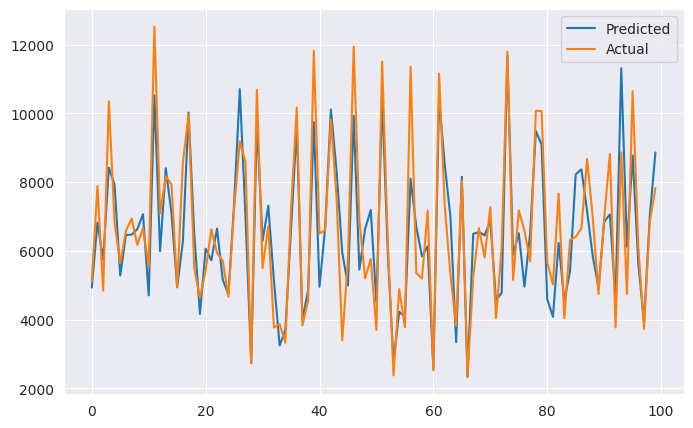

In [137]:
# Plotting the y Actual and Y predicted on a same plane
plt.figure(figsize=(8,5))
plt.plot(y_pred_en_cv_test[:100])
plt.plot(np.array(y_test[:100]))
plt.legend(["Predicted","Actual"])
plt.show()

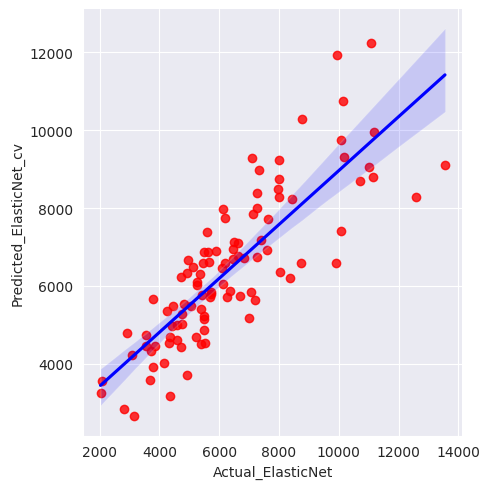

In [139]:
# Plotting the data on a plane and fitting a regression line
sns.lmplot(x= 'Actual_ElasticNet', y= 'Predicted_ElasticNet_cv', data= pd.DataFrame({'Actual_ElasticNet':y_test[150:250],
                                      'Predicted_ElasticNet_cv':y_pred_en_cv_test[150:250]}), scatter_kws={'color': 'red'}, line_kws= {'color': 'b'})

In [191]:
observation_df= pd.DataFrame({'MSE TRAIN':[MSE_lr_train,MSE_lasso_cv_train,MSE_ridge_cv_train,MSE_elasticnet_cv_train],
                             'RMSE TRAIN':[RMSE_lr_train,RMSE_lasso_cv_train,RMSE_ridge_cv_train,RMSE_elasticnet_cv_train],
                            'R2 SCORE TRAIN':[r2_lr_train,r2_lasso_cv_train,r2_ridge_cv_train,r2_elasticnet_cv_train],
                            'MAPE TRAIN %':[MAPE_lr_train, MAPE_lasso_cv_train, MAPE_ridge_cv_train, MAPE_en_cv_train],
                             'MSE TEST':[MSE_lr_test,MSE_lasso_cv_test,MSE_ridge_cv_test,MSE_elasticnet_cv_test],
                             'RMSE TEST':[RMSE_lr_test,RMSE_lasso_cv_test,RMSE_ridge_cv_test,RMSE_elasticnet_cv_test],
                              'R2 SCORE TEST':[r2_lr_test,r2_lasso_cv_test,r2_ridge_cv_test, r2_elasticnet_cv_test],
                             'MAPE TEST %':[MAPE_lr_test, MAPE_lasso_cv_test, MAPE_ridge_cv_test, MAPE_en_cv_test]},
                             index=['LINEAR REGRESSION','LASSO REGRESSION', 'RIDGE REGRESSION', 'ELASTICNET REGRESSION'], dtype= str)

In [192]:
observation_df

,MSE TRAIN,RMSE TRAIN,R2 SCORE TRAIN,MAPE TRAIN %,MSE TEST,RMSE TEST,R2 SCORE TEST,MAPE TEST %
LINEAR REGRESSION,1176204.106006097,1084.5294398982892,0.7783031864226007,13.753695506823076,1177168.7708438265,1084.9740876370397,0.7774273721084137,13.738849454261079
LASSO REGRESSION,1176204.1095310252,1084.529441523385,0.7783031857582046,13.75369477637991,1177169.4213025034,1084.9743873946995,0.7774272491232475,13.738854285490607
RIDGE REGRESSION,1176204.1147424236,1084.529443925993,0.7783031847759342,13.753690555987678,1177169.162587242,1084.9742681682558,0.777427298039713,13.738852436812236
ELASTICNET REGRESSION,1176206.0804273102,1084.530350164213,0.7783028142738474,13.753648578564597,1177175.1856853408,1084.977043851777,0.7774261592252922,13.738929665344815
